# Introduction

This project aims to analyse and visualise South Korea's coronavirus data present at [Kaggle](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset). While the recommendations provided are based on the data analysis, it is important to note that making widespread medical decisions should involve consultation with experts and consider a range of factors beyond just the data. The goal is to create a list of recommendations of how the population of a country should behave during a widespread pandemic based purely on the data that we will be going through with as little outside information as possible.

In this project, we will examine several factors related to the spread of coronavirus in South Korea. By analyzing the available data, we aim to identify the primary modes of transmission, identify vulnerable groups that should take additional precautions, and understand the factors that can impact the spread of the virus.

# Initialization

First we import the libraries that we will be using as well as the functions module that has majority of the custom functions used in this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from functions import *

Imported functions: ['calculate_differences', 'count_words', 'find_word', 'get_date_range', 'get_matching_entries', 'plot_data', 'plot_differences', 'set_parameters']


Since there are quite a few datasets, I decided to use a function that imports all of them.

In [2]:
def import_dataset(filepath: str) -> None:
    """
    Import datasets from CSV files in the specified folder.

    Args:
        filepath (str): The path to the folder containing the CSV files.

    This function reads all the CSV files in the specified folder and imports
    them as pandas DataFrames.
    The DataFrames are assigned to variables with names derived from the
    filenames (without the .csv extension), converted to lowercase.
    The variables are added to the global namespace.

    Note:
        - Make sure the CSV files are present in the specified folder.
        - The CSV files should have the extension '.csv'
        to be considered for import.
        - The variable names are derived from the filenames by removing
        the '.csv' extension and converting to lowercase.
        - The variables are added to the global namespace,
        allowing access from other parts of the code.

    Example:
        If there is a file named 'data.csv' in the specified folder, it will
        be imported as a DataFrame and assigned to the variable 'data_data'.
    """
    datasets = []
    files = os.listdir(filepath)
    for file in files:
        if file.endswith('.csv'):
            filename = os.path.splitext(file)[0].casefold() + '_data'
            df = pd.read_csv(os.path.join(filepath, file))
            globals()[filename] = df
            datasets.append(filename)
    print(f'Imported datasets: {datasets}')

Usually all custom functions would be in the functions.py module, however this function declares some global variables and if it were to be in the functions module, the module itself would need to be reimported after the use of this function.

We use the function to import the datasets.

In [3]:
filepath = 'datasets/'
import_dataset(filepath)

Imported datasets: ['case_data', 'patientinfo_data', 'policy_data', 'region_data', 'searchtrend_data', 'seoulfloating_data', 'time_data', 'timeage_data', 'timegender_data', 'timeprovince_data', 'weather_data']


# Data exploration

## Case data

We will begin by attempting to find out in what environments most cases happen. We will start with looking at case data.

In [4]:
case_data.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


Next we will look for NaN values.

In [5]:
case_data.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

We can see that none of the columns have NaN values in them, we will proceed to investigate the columns of the dataframe

In [6]:
case_data.columns

Index([' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'],
      dtype='object')

In [7]:
case_data.columns = case_data.columns.str.strip()
case_data.set_index('case_id', inplace=True)

We saw that some of the columns had trailing characters, we removed them and set 'case_id' as index.

In [8]:
case_data.head()

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [9]:
case_data.dtypes

province          object
city              object
group               bool
infection_case    object
confirmed          int64
latitude          object
longitude         object
dtype: object

We will try to plot the coordinates of cases, for that we need to turn latitude and longitude values to numeric data types.

In [10]:
case_data['latitude'].unique()

array(['37.538621', '37.48208', '37.508163', '37.546061', '37.679422',
       '37.481059', '-', '37.592888', '37.481735', '37.63369', '37.55713',
       '37.57681', '37.48825', '37.562405', '37.558147', '37.594782',
       '37.560899', '37.520846', '37.522331', '37.524623', '37.498279',
       '37.559649', '37.565699', '37.486837', '35.21628', '35.16708',
       '35.20599', '35.17371', '35.84008', '35.857375', '35.885592',
       '35.857393', '35.88395', '35.136035', '36.3400973', '36.3398739',
       '36.346869', '36.358123', '36.504713', '36.48025', '37.455687',
       '37.530579', '37.758635', '37.38833', '37.381784', '37.287356',
       '37.403722', '37.2376', '37.342762', '36.82422', '36.81503',
       '37.000354', '35.078825', '35.64887', '36.92757', '35.782149',
       '36.646845', '36.0581', '35.84819', '35.82558', '35.68556',
       '35.164845', '35.805681', '35.22115', '35.54127', '35.338811'],
      dtype=object)

We can see that there is a non-numeric entry, we will be removing it.

In [11]:
mapping_data = case_data[case_data['latitude'] != '-']

In [12]:
mapping_data['longitude'].unique()

array(['126.992652', '126.901384', '126.884387', '126.874209',
       '127.044374', '126.894343', '127.056766', '126.930121', '126.9165',
       '127.0403', '127.006', '127.08559', '126.984377', '126.943799',
       '126.968022', '126.966998', '126.931278', '127.057388',
       '126.843118', '127.030139', '126.835102', '126.977079',
       '126.893163', '129.0771', '129.1124', '129.1256', '129.0633',
       '128.5667', '128.466651', '128.556649', '128.466653', '128.624059',
       '126.956405', '127.3927099', '127.3819744', '127.368594',
       '127.388856', '127.265172', '127.289', '127.161627', '126.775254',
       '127.077716', '127.1218', '126.93615', '127.013827', '126.954939',
       '127.0517', '127.983815', '127.9552', '127.1139', '126.354443',
       '126.316746', '128.7368', '128.9099', '128.801498', '128.437416',
       '128.4941', '128.7621', '128.7373', '127.9127', '128.126969',
       '127.917805', '128.6866', '128.5008', '129.017508'], dtype=object)

We see that it also got rid of any '-' values that might have been present in the longitude column as well. Next we turn strings into numeric values.

In [13]:
mapping_data = mapping_data.apply(pd.to_numeric, errors='ignore')

In [14]:
mapping_data.dtypes

province           object
city               object
group                bool
infection_case     object
confirmed           int64
latitude          float64
longitude         float64
dtype: object

Now that we have the coordinates as float64 data type, we can plot them on the map using GeoPandas.

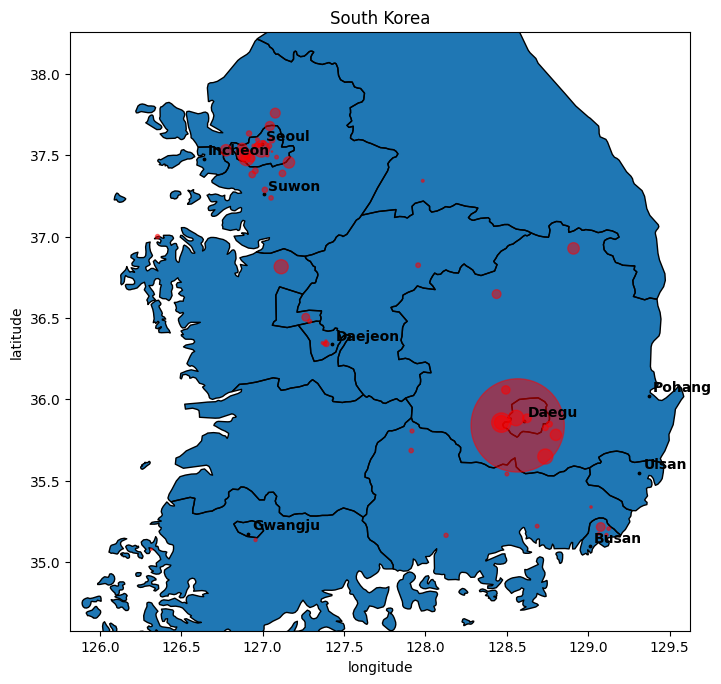

In [15]:
plot_data(mapping_data)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('South Korea');

We can see that majority of the cases happened around Seoul province. We can also see that the cases with most people getting infected happened around Daegu. Next we will look at in which institutions infections tend to happen the most often.

## Most frequent places of coronavirus transmission

Now we will look at which provinces had the most cases.

In [16]:
cases = case_data.loc[:, ['province', 'confirmed']].groupby(['province']).sum()
cases

,confirmed
province,
Busan,156
Chungcheongbuk-do,60
Chungcheongnam-do,158
Daegu,6680
Daejeon,131
Gangwon-do,62
Gwangju,43
Gyeonggi-do,1000
Gyeongsangbuk-do,1324


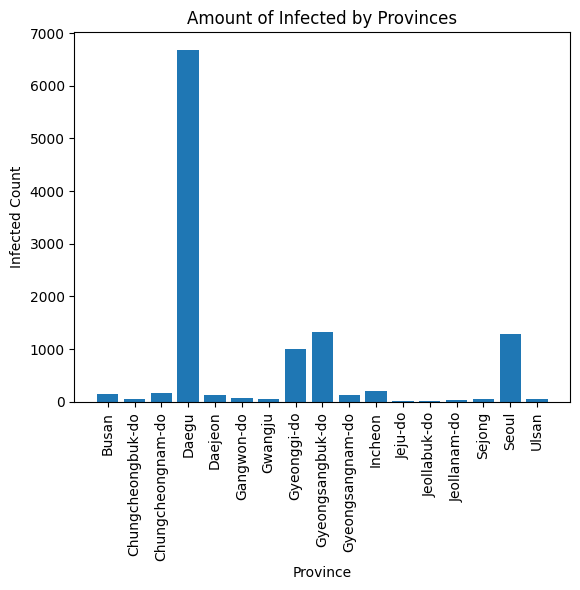

In [17]:
plt.bar(cases.index, cases.confirmed)
plt.xticks(rotation=90)
plt.title('Amount of Infected by Provinces')
plt.xlabel('Province')
plt.ylabel('Infected Count');

We see that Daegu, Seoul, Gyeongsangbuk-do and Gyeonggi-do provinces have the highest amounts of people that got infected. We pick out those provinces, assign them to a seperate variable and will be using them to find out in where covid happens to be transmitted most often.

In [18]:
regex_search_data = case_data[case_data['province'].isin(['Daegu', 'Seoul',
                                                          'Gyeongsangbuk-do',
                                                          'Gyeonggi-do'])]

In [19]:
regex_search_data

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...
6000009,Gyeongsangbuk-do,Gyeongsan-si,True,Gyeongsan Cham Joeun Community Center,16,35.82558,128.7373
6000010,Gyeongsangbuk-do,Gumi-si,True,Gumi Elim Church,10,-,-
6000011,Gyeongsangbuk-do,-,False,overseas inflow,22,-,-


We can see that there is some data that does not have much information about the case, and it tends to have the value 'False' in the 'group' column.

In [20]:
regex_search_data[regex_search_data['group'] == False]

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000036,Seoul,-,False,overseas inflow,298,-,-
1000037,Seoul,-,False,contact with patient,162,-,-
1000038,Seoul,-,False,etc,100,-,-
1200008,Daegu,-,False,overseas inflow,41,-,-
1200009,Daegu,-,False,contact with patient,917,-,-
1200010,Daegu,-,False,etc,747,-,-
2000020,Gyeonggi-do,-,False,overseas inflow,305,-,-
2000021,Gyeonggi-do,-,False,contact with patient,63,-,-
2000022,Gyeonggi-do,-,False,etc,84,-,-


We see that entries that have a 'False' value in the 'group' column throughout the entire dataframe do not have a lot of detail to them. We will be removing those entries.

In [21]:
regex_search_data = regex_search_data[regex_search_data['group'] == True]

Using regular expression type searching we can look through the 'infection_case' column and find which words tend to repeat the most often. The count_words function only looks at the last word of the string, as it most often tends to tell us what place it is.

In [22]:
top_common_words = count_words(regex_search_data, 'infection_case', n=5)

By knowing which words tend to appear the most often, we can pick out the entries based on those words and then find out how many people got infected in those types of places. find_word function returns a filtered dataframe that has only entries that contain the specified 'word'. By selecting the 'confirmed' column and using the 'sum' function we can find out just what we are looking for.

In [23]:
word_count = {}
for word in top_common_words:
    count = find_word(regex_search_data,'infection_case', word).confirmed.sum()
    word_count[word] = count

We can turn the dictionary into a Series object and plot the data of those entries in a bar chart.

In [24]:
top_words = pd.Series(word_count)

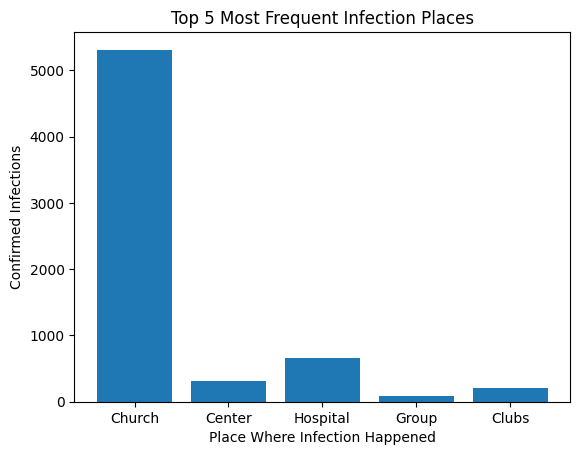

In [25]:
plt.bar(top_words.index, height=top_words)
plt.ylabel('Confirmed Infections')
plt.xlabel('Place Where Infection Happened')
plt.title(f'Top {len(top_words)} Most Frequent Infection Places');

It is important to take into account that while this chart might not be completely accurate, it gives us a rough idea of how most cases in the dataset happened.Most of them happened in social places like churches, hospitals, clubs. We can also see that churches have by far the most infections, we can look into that closer.

In [26]:
case_data[case_data['infection_case'].str.contains('Church')]

,province,city,group,infection_case,confirmed,latitude,longitude
case_id,,,,,,,
1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121
1000021,Seoul,from other city,True,Shincheonji Church,8,-,-
1000025,Seoul,Gangnam-gu,True,Gangnam Dongin Church,1,37.522331,127.057388
1100001,Busan,Dongnae-gu,True,Onchun Church,39,35.21628,129.0771
1100002,Busan,from other city,True,Shincheonji Church,12,-,-
1100004,Busan,Haeundae-gu,True,Haeundae-gu Catholic Church,6,35.20599,129.1256


We see that majority of infections are from Shincheonji Church case in Daegu province and that skews the chart quite a bit, however it does not change that churches are one of the most common places where coronavirus was transmitted. To conclude, majority of infections tend to happen in social institutions, during a pandemic attendance of non-essential social gatherings should be discouraged otherwise precautions and safety measures should be taken.

## Policy data

Next we will try to look at what policies could have had an impact on the spread of coronavirus in South Korea. We will start by looking at time_data dataset.

In [27]:
time_data.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [28]:
time_data.isna().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [29]:
time_data.date.nunique()

163

We manually choose some points of interest (points after which there is a change in the trend).

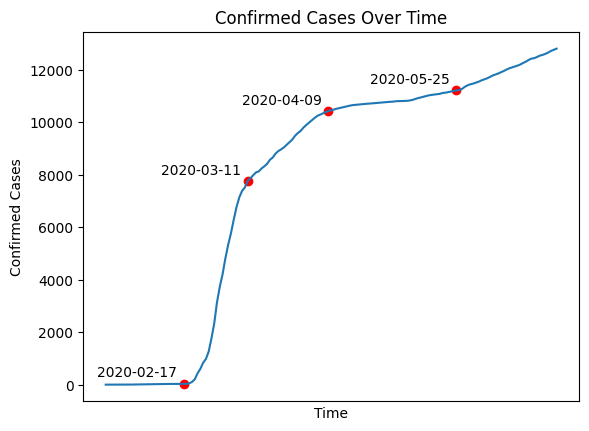

In [30]:
points_of_interest = [28, 51, 80, 126]
dates_of_interest = [time_data.date[i] for i in points_of_interest]
plt.plot(time_data.date, time_data.confirmed)
plt.scatter(points_of_interest,
            [time_data.confirmed[i] for i in points_of_interest],
            color='red')

# Annotate the points with dates and arrows
for i in points_of_interest:
    plt.annotate(time_data.date[i], (i, time_data.confirmed[i]),
                 xytext=(-5, 5), textcoords='offset points',
                 color='black', ha='right')

plt.xticks([])
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Over Time');

We previously used indexes to plot the point and then indexed into the time_data 'date' column to get exact dates. Since the dataset offers cumulative numbers we can use numpy 'diff' function to find out the amount of daily confirmed cases.

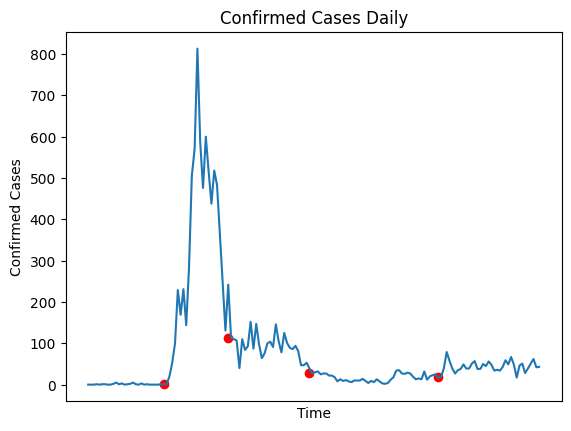

In [31]:
# Calculate differences between consecutive data points
differences = np.diff(time_data.confirmed)

# Plot the differences
plt.plot(time_data.date[1:], differences)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Daily')
# Plot only the points of interest
plt.scatter(time_data.date[points_of_interest],
            differences[points_of_interest],
            color='red')
plt.xticks([]);

This perspective provides valuable insights into the data, allowing us to observe it from a different angle. By analyzing the data, we can identify the periods when infection numbers experienced fluctuations, and determine if there were any spikes in confirmed cases. Next, our focus will be to determine the typical duration between the onset of symptoms and obtaining a positive test result.

In [32]:
patientinfo_data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [33]:
patientinfo_data.symptom_onset_date.count()

690

We can see that majority of entries do not have symptom onset date. To get only the entries that we need, we will need to drop the entries that have NaN values in them.

In [34]:
filtered_patientinfo = patientinfo_data.dropna(subset=['symptom_onset_date'])

In [35]:
filtered_patientinfo['symptom_onset_date'].unique()

array(['2020-01-22', '2020-01-26', '2020-02-06', '2020-02-11',
       '2020-02-21', '2020-02-19', '2020-02-24', '2020-02-25',
       '2020-02-23', '2020-02-26', '2020-02-20', '2020-02-27',
       '2020-02-18', '2020-03-01', '2020-03-02', '2020-03-06',
       '2020-03-04', '2020-02-28', '2020-03-05', '2020-03-07',
       '2020-02-29', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-15', '2020-03-13',
       '2020-03-16', '2020-03-19', '2020-03-17', '2020-03-18',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-20', '2020-03-29',
       '2020-03-28', '2020-03-27', '2020-04-01', '2020-04-05',
       '2020-04-07', '2020-04-12', '2020-05-04', '2020-05-07',
       '2020-05-05', '2020-05-06', '2020-05-08', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-15', '2020-05-17',
       '2020-05-18', '2020-05-24', '2020-05-21', '2020-05-25',
       '2020-05-26', '2020-05-27', '2020-05-28', '2020-

We can see that there is an entry with a whitespace, which would later cause problems, we will be removing it.

In [36]:
filtered_patientinfo = filtered_patientinfo[
    filtered_patientinfo['symptom_onset_date'] != ' ']

Next we will turn the strings of dates into datetime objects so that we could do calculations with them and if needed use them in plotting.

In [37]:
filtered_patientinfo['symptom_onset_date'] = pd.to_datetime(
    filtered_patientinfo['symptom_onset_date'])
filtered_patientinfo['confirmed_date'] = pd.to_datetime(
    filtered_patientinfo['confirmed_date'])
filtered_patientinfo.dtypes

patient_id                     int64
sex                           object
age                           object
country                       object
province                      object
city                          object
infection_case                object
infected_by                   object
contact_number                object
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date                 object
deceased_date                 object
state                         object
dtype: object

We will now make a seperate column that gives us information on how many days it usually takes to get a positive diagnosis after feeling symptoms.

In [38]:
filtered_patientinfo['date_difference'] = (
    filtered_patientinfo['confirmed_date'] - 
    filtered_patientinfo['symptom_onset_date'])
filtered_patientinfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,date_difference
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1 days
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,4 days
13,1000000014,female,60s,Korea,Seoul,Jongno-gu,contact with patient,1000000013,27,2020-02-06,2020-02-16,2020-03-12,NaN,released,10 days
14,1000000015,male,70s,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released,8 days
25,1000000026,male,30s,Korea,Seoul,Seocho-gu,etc,NaN,NaN,2020-02-21,2020-02-22,2020-03-11,NaN,released,1 days


Now we will get the amount of how many entries there are for different days and the percentage that each of them make up.

In [39]:
grouped_data = filtered_patientinfo.groupby('date_difference').size()
total_count = grouped_data.sum()
percentage_data = (grouped_data / total_count) * 100
percentage_data

date_difference
-8 days     0.145349
-2 days     0.145349
-1 days     0.290698
0 days      3.779070
1 days     20.058140
2 days     16.279070
3 days     13.953488
4 days      9.156977
5 days      9.011628
6 days      6.831395
7 days      4.360465
8 days      4.941860
9 days      2.470930
10 days     2.180233
11 days     1.453488
12 days     1.017442
13 days     1.162791
14 days     0.290698
15 days     0.581395
16 days     0.290698
19 days     0.145349
25 days     0.145349
27 days     0.145349
33 days     0.145349
41 days     0.145349
42 days     0.145349
45 days     0.436047
47 days     0.145349
48 days     0.145349
dtype: float64

We can see that for the vast majority of cases it takes around 8 days from symptoms to get a positive diagnosis since getting symptoms.

In [40]:
confirmation_days = 8

Now we will look at some policy data and try to see which policies could have had a significant impact on the covid infections trend.

In [41]:
policy_data.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [42]:
policy_data.isna().sum()

policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_date     0
end_date      37
dtype: int64

From the dataset, it is evident that the majority of entries do not contain NaN values, except for the 'end_date' column. The presence of numerous NaN values in this column is likely due to ongoing policies that had not yet ended at the time of data collection. We will convert the strings in the policy_data dataset into datetime objects.

In [43]:
policy_data['start_date'] = pd.to_datetime(policy_data['start_date'])
policy_data['end_date'] = pd.to_datetime(policy_data['end_date'],
                                         errors='ignore')
policy_data.dtypes

policy_id              int64
country               object
type                  object
gov_policy            object
detail                object
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

We can now get the policies, if there were any, leading up to the change in the trend of amount of cases. We will be doing that with a couple of functions, one of which calculates and returns a range of dates and another that will filter out a dataframe based on that range of dates.

In [44]:
get_matching_entries(dates_of_interest[1:3],
                     policy_data,
                     'start_date',
                     confirmation_days)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaT
1,26,Korea,Health,Drive-Through Screening Center,Standard Operating Procedures,2020-03-04,NaT
2,28,Korea,Health,Mask Distribution,5-day Rotation System,2020-03-09,NaT
3,50,Korea,Technology,Open API,Public Mask Sales Information,2020-03-08,NaT
4,52,Korea,Technology,Self-Quarantine Safety Protection App,NaN,2020-03-07,NaT
5,18,Korea,Immigration,Mandatory 14-day Self-Quarantine,from all the countries,2020-04-01,NaT


8 Days after these policies have been enacted, the amount of people getting covid dropped. Currently it is difficult to say which policies exactly might have had the biggest impact. So far the data points that either one of these could reduce the amount of people getting infected, but we also need to investigate what other policies could have cause a change.

In [45]:
get_matching_entries(dates_of_interest[::3],
                     policy_data,
                     'end_date',
                     confirmation_days)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,39,Korea,Education,School Opening with Online Class,High School (3rd grade),2020-04-09,2020-05-20


After this policy the amount of cases increased slightly, however once again at this stage it is difficult to say anything with certainty, whether it was the end of this exact policy that led to the increase. To conclude, I would claim that the policies that most likely has the highest impact in lessening the amount of people transmitting covid were Drive-Through Screening Center, Mask Distribution, Mandatory 14-day Self-Quarantine policies. Also i would claim that ending 'School Opening with Online Class' policy likely could have increased the amount of people transmitting covid.

## Weather data

Next we can try looking at the weather patterns and see if there are any similarities between amount of coronavirus transmissions and weather patterns.

In [46]:
weather_data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


We will look at how many entries there are as well as look for NaN values.

In [47]:
weather_data.count()

code                     26271
province                 26271
date                     26271
avg_temp                 26256
min_temp                 26266
max_temp                 26268
precipitation            26271
max_wind_speed           26262
most_wind_direction      26242
avg_relative_humidity    26251
dtype: int64

In [48]:
weather_data.isna().sum()

code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64

We check which entries have NaN values.

In [49]:
weather_data[weather_data.isna().any(axis=1)]

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
5693,60000,Gyeongsangbuk-do,2016-12-21,NaN,4.2,15.4,10.0,3.3,NaN,NaN
5784,30000,Gangwon-do,2016-12-27,1.0,-2.5,4.3,23.0,4.5,NaN,85.4
5800,30000,Gangwon-do,2016-12-28,0.5,-4.0,5.8,0.0,5.6,NaN,54.9
6861,60000,Gyeongsangbuk-do,2017-03-04,NaN,2.2,14.7,0.0,6.0,50.0,47.3
9197,60000,Gyeongsangbuk-do,2017-07-28,NaN,19.2,28.9,14.5,3.9,NaN,NaN
9202,12000,Daegu,2017-07-29,NaN,21.5,26.2,30.0,5.2,140.0,91.3
9757,60000,Gyeongsangbuk-do,2017-09-01,20.3,15.0,25.7,0.0,7.9,NaN,66.6
10400,10000,Seoul,2017-10-12,11.4,8.8,NaN,0.0,4.5,270.0,71.0
10432,10000,Seoul,2017-10-14,14.4,9.0,20.5,0.0,NaN,NaN,42.8
11083,50000,Jeollabuk-do,2017-11-23,2.4,NaN,5.4,2.6,4.8,90.0,76.3


We see that out of all entries that have NaN values, only the last one is of interest to us, we will drop the rest of NaN values after turning them to datetime objects.

In [50]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data = weather_data[weather_data['date'] >= '2020-02-09']

We will check which provinces had the most infected people overall and based on that look at those provinces weather data.

In [51]:
patientinfo_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [52]:
patientinfo_data.groupby('province').size()

province
Busan                 151
Chungcheongbuk-do      56
Chungcheongnam-do     168
Daegu                 137
Daejeon               119
Gangwon-do             63
Gwangju                44
Gyeonggi-do          1208
Gyeongsangbuk-do     1254
Gyeongsangnam-do      133
Incheon               343
Jeju-do                19
Jeollabuk-do           27
Jeollanam-do           25
Sejong                 51
Seoul                1312
Ulsan                  55
dtype: int64

We can see that Seoul, Gyeonggi-do and Gyeongsangbuk-do tend to have the most infected, so we will be investigating weather patterns for those provinces only. We will keep entries only from those 3 provinces.

In [53]:
weather_data = weather_data[weather_data['province']
                            .isin(['Seoul', 'Gyeonggi-do',
                                   'Gyeongsangbuk-do'])]
weather_data

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
23999,10000,Seoul,2020-02-09,-0.5,-5.6,4.1,0.0,4.4,270.0,51.1
24006,20000,Gyeonggi-do,2020-02-09,-0.9,-7.0,3.9,0.0,5.3,290.0,76.1
24012,60000,Gyeongsangbuk-do,2020-02-09,2.5,-2.4,8.1,0.0,5.8,270.0,40.9
24015,10000,Seoul,2020-02-10,4.0,-0.7,9.6,0.0,4.2,290.0,49.4
24022,20000,Gyeonggi-do,2020-02-10,3.2,-1.9,10.5,0.0,4.5,250.0,72.5
...,...,...,...,...,...,...,...,...,...,...
26246,20000,Gyeonggi-do,2020-06-28,23.5,20.0,28.7,0.0,5.5,290.0,82.0
26252,60000,Gyeongsangbuk-do,2020-06-28,23.3,19.2,28.4,0.2,7.3,50.0,79.0
26255,10000,Seoul,2020-06-29,23.8,20.6,26.5,11.9,5.9,50.0,77.0
26262,20000,Gyeonggi-do,2020-06-29,22.7,17.3,26.8,29.5,6.1,110.0,84.3


We see that there are some columns that do not interest us, we will be dropping them, setting the province as index and then plotting the weather data changes of provinces over time.

In [54]:
weather_plot = weather_data.drop(['code', 'most_wind_direction',
                                  'precipitation', 'max_temp',
                                  'min_temp'],
                                 axis=1)
weather_plot.set_index('province', inplace=True)
weather_plot

,date,avg_temp,max_wind_speed,avg_relative_humidity
province,,,,
Seoul,2020-02-09,-0.5,4.4,51.1
Gyeonggi-do,2020-02-09,-0.9,5.3,76.1
Gyeongsangbuk-do,2020-02-09,2.5,5.8,40.9
Seoul,2020-02-10,4.0,4.2,49.4
Gyeonggi-do,2020-02-10,3.2,4.5,72.5
...,...,...,...,...
Gyeonggi-do,2020-06-28,23.5,5.5,82.0
Gyeongsangbuk-do,2020-06-28,23.3,7.3,79.0
Seoul,2020-06-29,23.8,5.9,77.0


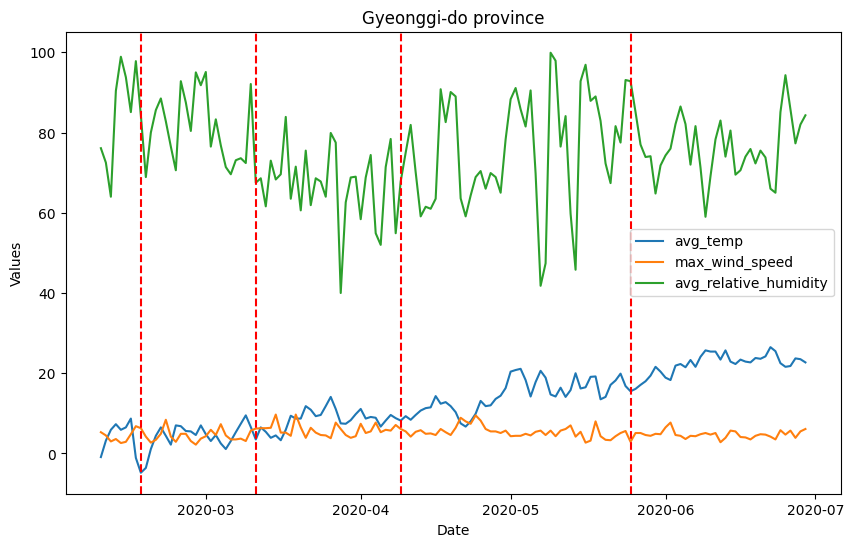

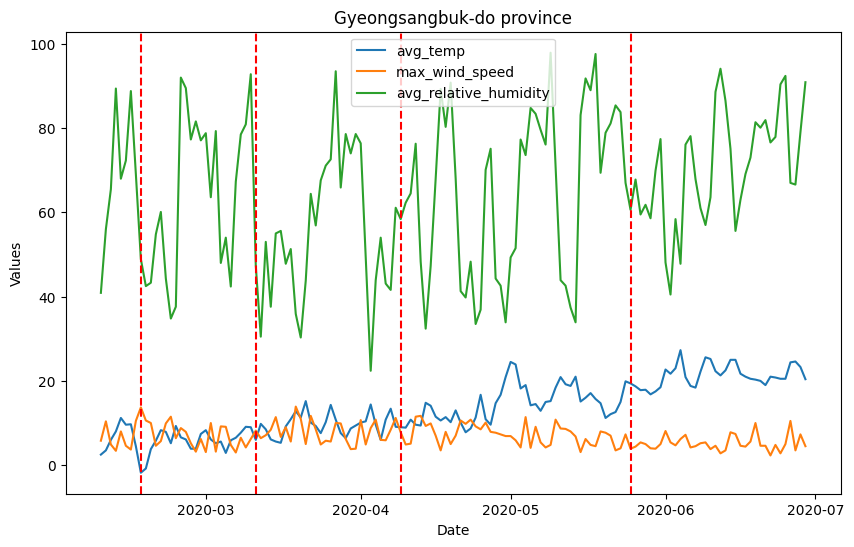

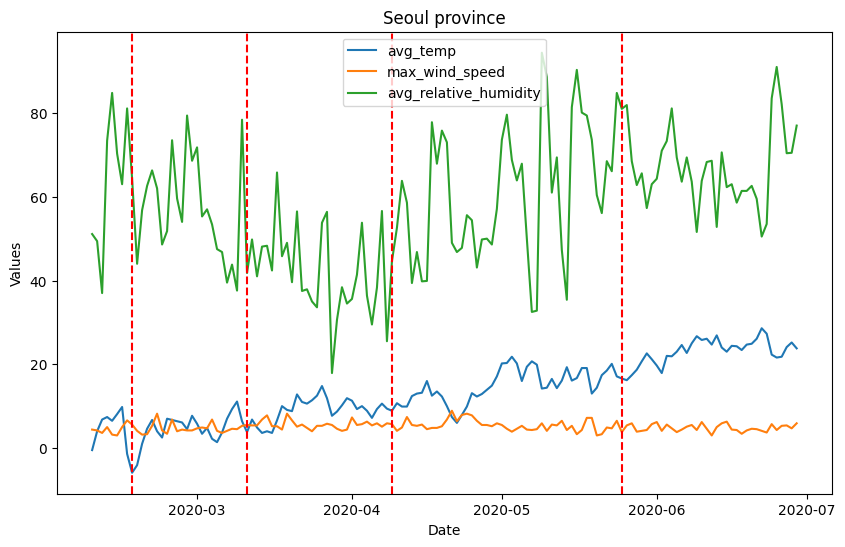

In [55]:
# Group the DataFrame by index (province) and iterate over each group
for province, data in weather_plot.groupby(level=0):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each column on the same graph
    for column in data.columns[1:]:
        ax.plot(data['date'], data[column], label=column)

    # Set the title, x-axis label, and y-axis label
    set_parameters(f'{province} province', 'Date', 'Values', rotation=0)

    # Convert the dates of interest from strings to datetime objects
    dates = [
    datetime.datetime.strptime(date, '%Y-%m-%d')
    for date in dates_of_interest]

    # Plot vertical lines at the dates of interest
    for date in dates:
        ax.axvline(date, color='red', linestyle='--')

Looking at the data we just plotted, it is difficult to draw a relation between an increase or decrease in infections and average relative humidity, max wind speed and average temperatur as it tends to fluxuate all the time.

## Region data

Next we will try to look into whether there is a relation between infections and regional data, like school counts, ratios and elderly population. First we will need to find out which cities have the most infections.

In [56]:
patientinfo_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [57]:
patientinfo_data.isna().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [58]:
infections_cities = patientinfo_data.groupby('city').size().sort_values(ascending=False)
infections_cities.head()

city
Gyeongsan-si    639
Seongnam-si     173
Bucheon-si      162
Gwanak-gu       113
Cheonan-si      110
dtype: int64

We can see that Gyeongsan-si, Seongnam-si, Bucheon-si, Gwanak-gu and Cheonan-si tend to have the most infections, we can now look at their region data.

In [59]:
region_data

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


Next we will drop the columns that we are not going to be using and leave only the data from provinces that we are going to investigate.

In [60]:
dropped_region_data = region_data.drop(['code', 'latitude', 'longitude'],
                                       axis=1)
region_data = region_data[region_data['city'].isin(['Gyeongsan-si',
                                                     'Seongnam-si',
                                                     'Bucheon-si',
                                                     'Gwanak-gu',
                                                     'Cheonan-si'])]
region_data

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
93,20110,Gyeonggi-do,Bucheon-si,37.503393,126.766049,64,124,4,1.51,12.77,5.4,1432
94,20120,Gyeonggi-do,Seongnam-si,37.420000,127.126703,72,127,3,2.08,13.52,5.6,2095
157,41120,Chungcheongnam-do,Cheonan-si,36.814980,127.113868,75,112,6,1.91,10.42,4.5,1069
200,60010,Gyeongsangbuk-do,Gyeongsan-si,35.825056,128.741544,31,61,10,1.34,16.18,7.0,427


We can see that there are no NaN values, all of the 5 cities that we are going to investigate are present, therefore we can proceed in investigating the relations between the variables. Since there are some values that are very high and some that are very low we will plot them in different graphs.


In [61]:
graph_data_high = (region_data[['city', 'elementary_school_count',
                                       'kindergarten_count',
                                       'nursing_home_count']]
                   .set_index(['city']))
graph_data_high

,elementary_school_count,kindergarten_count,nursing_home_count
city,,,
Gwanak-gu,22,33,909
Bucheon-si,64,124,1432
Seongnam-si,72,127,2095
Cheonan-si,75,112,1069
Gyeongsan-si,31,61,427


In [62]:
graph_data_low = (region_data[['city', 'university_count',
                                       'academy_ratio',
                                       'elderly_population_ratio',
                                       'elderly_alone_ratio']]
                  .set_index(['city']))
graph_data_low

,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio
city,,,,
Gwanak-gu,1,0.89,15.12,4.9
Bucheon-si,4,1.51,12.77,5.4
Seongnam-si,3,2.08,13.52,5.6
Cheonan-si,6,1.91,10.42,4.5
Gyeongsan-si,10,1.34,16.18,7.0


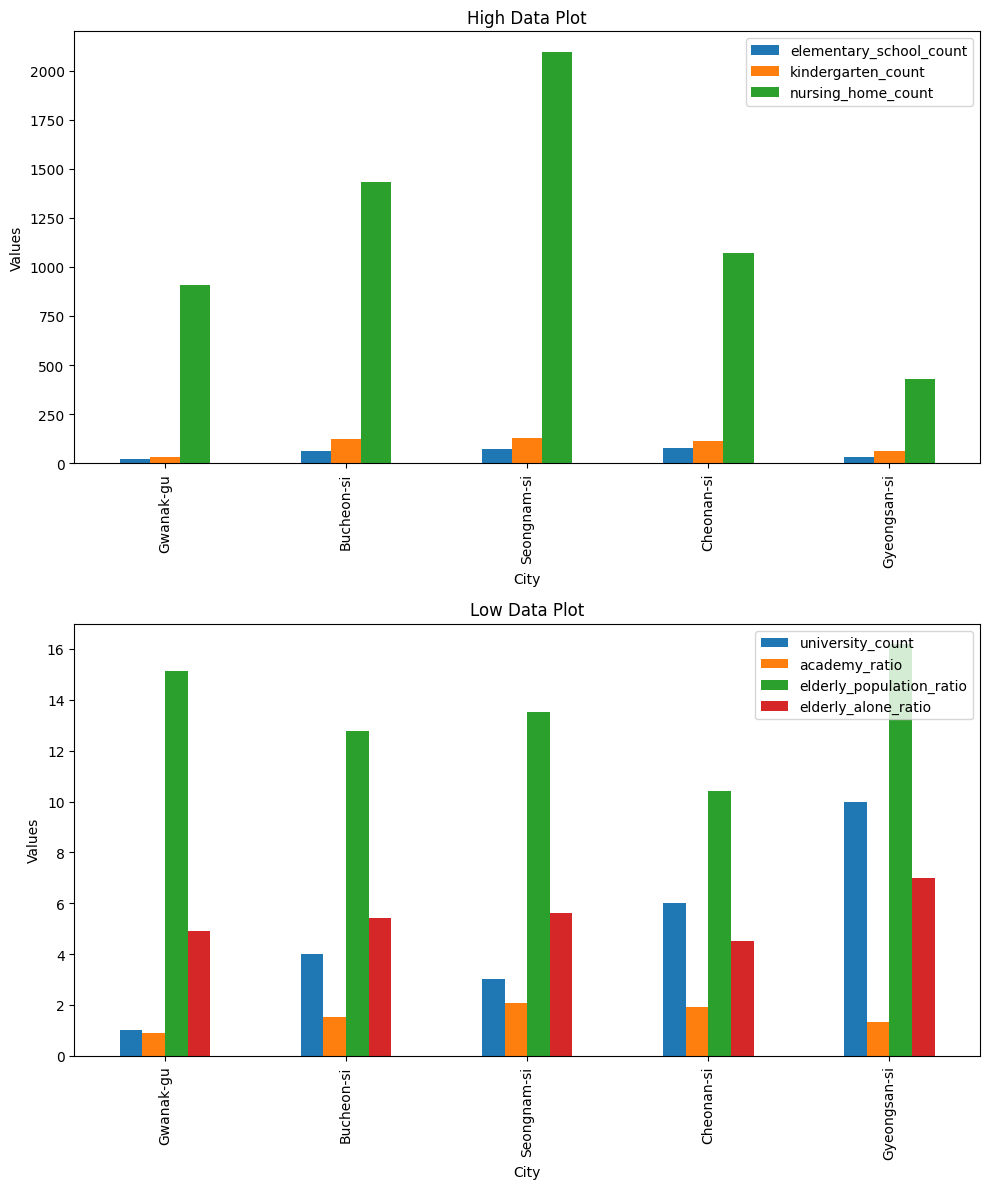

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plotting graph_data_high
graph_data_high.plot(kind='bar', ax=ax1)
ax1.set_xlabel('City')
ax1.set_ylabel('Values')
ax1.set_title('High Data Plot')

# Plotting graph_data_low
graph_data_low.plot(kind='bar', ax=ax2)
ax2.set_xlabel('City')
ax2.set_ylabel('Values')
ax2.set_title('Low Data Plot')

# Adjust the spacing between subplots
plt.tight_layout()

We see that it seems like elderly alone ratio stat could be the only one out of the 7 that follows a similar pattern to the amount of infections, at least for the top 5 cities that had the most patitent info. All the top 5 cities have elderly_alone_ratio stat in the same order as the amount of infection cases. However, I find it difficult to find what reason could be causing higher alone elderly population to have more cases. Further investigation is necessary to draw reliable conclusions.

## Age data

Now we will check which cities and people tend to be more vulnerable to infections and should take extra care. We will start by investigating age and gender data.

In [64]:
timeage_data

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


In [65]:
timeage_data.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [66]:
timeage_data.time.unique()

array([0], dtype=int64)

The time column does not reperesnt anything of value so we will drop it and turn the date column values into datetime objects and set them as index.

In [67]:
timeage_data.drop('time', axis=1, inplace=True)
timeage_data['date'] = pd.to_datetime(timeage_data['date'])
timeage_data.set_index(['date'], inplace=True)
timeage_data

,age,confirmed,deceased
date,,,
2020-03-02,0s,32,0
2020-03-02,10s,169,0
2020-03-02,20s,1235,0
2020-03-02,30s,506,1
2020-03-02,40s,633,1
...,...,...,...
2020-06-30,40s,1681,3
2020-06-30,50s,2286,15
2020-06-30,60s,1668,41


Now we will group different age groups into larger groups so that our plot would not be too cluttered.

In [68]:
timeage_data['age'] = timeage_data['age'].map({'0s': 'Young',
                                               '10s': 'Young',
                                               '20s': 'Young',
                                               '30s': 'Middle aged',
                                               '40s': 'Middle aged',
                                               '50s': 'Middle aged',
                                               '60s': 'Old',
                                               '70s': 'Old',
                                               '80s': 'Old'})
grouped_by_age = timeage_data.groupby(['date', 'age']).sum()
grouped_by_age

confirmed  deceased
date       age                             
2020-03-02 Middle aged       1973         7
           Old                803        15
           Young             1436         0
2020-03-03 Middle aged       2243         7
           Old                914        21
...                           ...       ...
2020-06-29 Old               3068       262
           Young             4246         0
2020-06-30 Middle aged       5463        20
           Old               3074       262
           Young             4263         0

[363 rows x 2 columns]

We will create a new column that shows the percentage of people for which the disease was fatal.

In [69]:
grouped_by_age['fatalities, %'] = (grouped_by_age['deceased'] * 100) / grouped_by_age['confirmed']

In [70]:
grouped_by_age

confirmed  deceased  fatalities, %
date       age                                            
2020-03-02 Middle aged       1973         7       0.354790
           Old                803        15       1.867995
           Young             1436         0       0.000000
2020-03-03 Middle aged       2243         7       0.312082
           Old                914        21       2.297593
...                           ...       ...            ...
2020-06-29 Old               3068       262       8.539765
           Young             4246         0       0.000000
2020-06-30 Middle aged       5463        20       0.366099
           Old               3074       262       8.523097
           Young             4263         0       0.000000

[363 rows x 3 columns]

We will prepare the data for the next few plots. We will calculate the differences between confirmed cases and fatality % for each age group.

In [71]:
differences, differences_fatalities, dates, age_ranges = calculate_differences(grouped_by_age, 'age', 'confirmed')

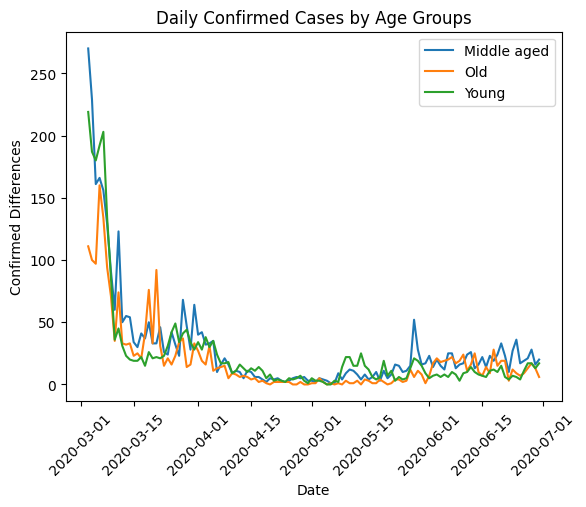

In [72]:
plot_differences(age_ranges, dates, differences)
set_parameters('Daily Confirmed Cases by Age Groups',
              'Date',
              'Confirmed Differences')

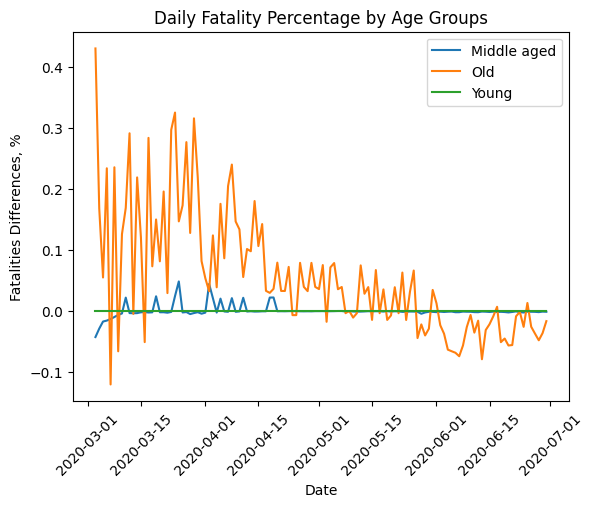

In [73]:
plot_differences(age_ranges, dates, differences_fatalities)
set_parameters('Daily Fatality Percentage by Age Groups',
              'Date',
              'Fatalities Differences, %')

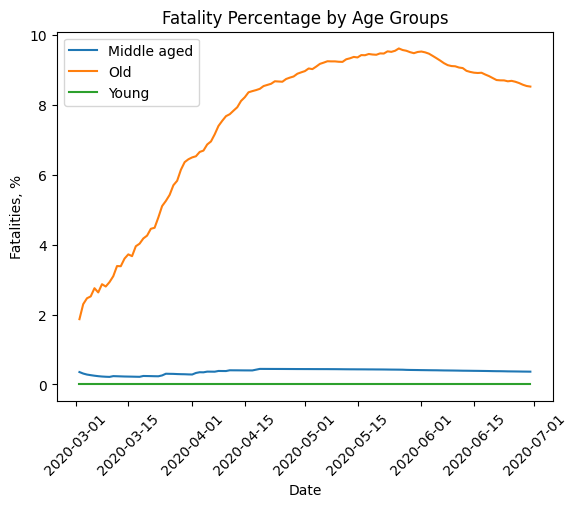

In [74]:
for age_range, timeage_range in grouped_by_age.groupby(level='age'):
    plt.plot(timeage_range.index.get_level_values('date'),
             timeage_range['fatalities, %'],
             label=age_range)

set_parameters('Fatality Percentage by Age Groups',
              'Date',
              'Fatalities, %')

By looking at the second and third graphs we can safely say that the older people are more likely to die from coronavirus.

## Gender data

Next we are going to investigate gender data in the same way.

In [75]:
timegender_data

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [76]:
timegender_data.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

In [77]:
timegender_data['date'] = pd.to_datetime(timegender_data['date'])
timegender_data.set_index(['date', 'sex'], inplace=True)
timegender_data.time.unique()

array([0], dtype=int64)

In [78]:
timegender_data.drop('time', axis=1, inplace=True)
timegender_data['fatalities, %'] = ((timegender_data['deceased'] * 100) / 
                                    timegender_data['confirmed'])
timegender_data

confirmed  deceased  fatalities, %
date       sex                                       
2020-03-02 male         1591        13       0.817096
           female       2621         9       0.343380
2020-03-03 male         1810        16       0.883978
           female       3002        12       0.399734
2020-03-04 male         1996        20       1.002004
...                      ...       ...            ...
2020-06-28 female       7265       131       1.803166
2020-06-29 male         5470       151       2.760512
           female       7287       131       1.797722
2020-06-30 male         5495       151       2.747953
           female       7305       131       1.793292

[242 rows x 3 columns]

In [79]:
differences, differences_fatalities, dates, genders = calculate_differences(timegender_data, 'sex', 'confirmed')

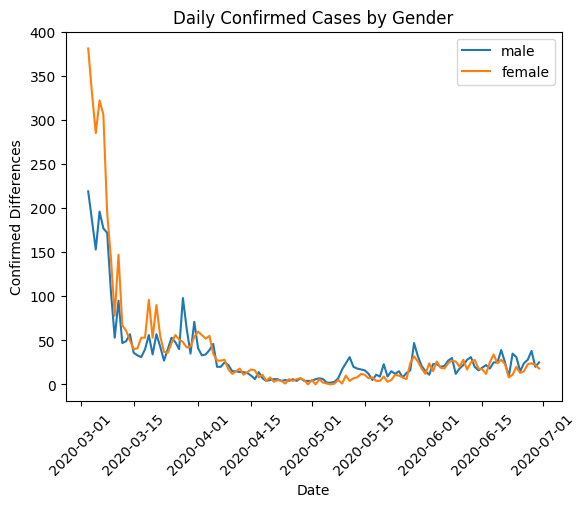

In [80]:
for gender in genders:
    plt.plot(dates, differences[gender], label=gender)
    
set_parameters('Daily Confirmed Cases by Gender',
              'Date',
              'Confirmed Differences')

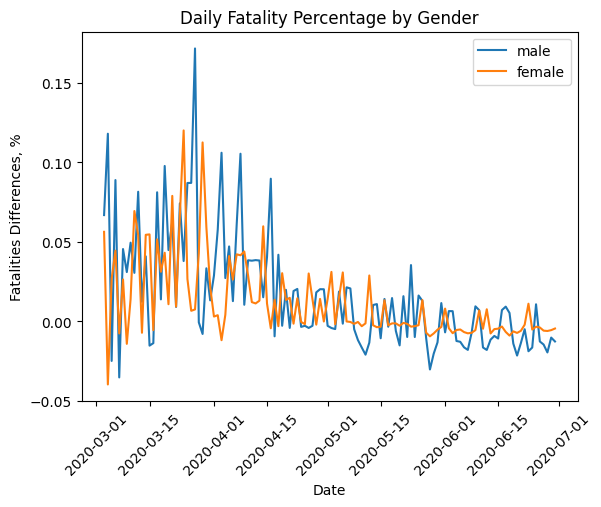

In [81]:
for gender in genders:
    plt.plot(dates, differences_fatalities[gender], label=gender)
    
set_parameters('Daily Fatality Percentage by Gender',
              'Date',
              'Fatalities Differences, %')

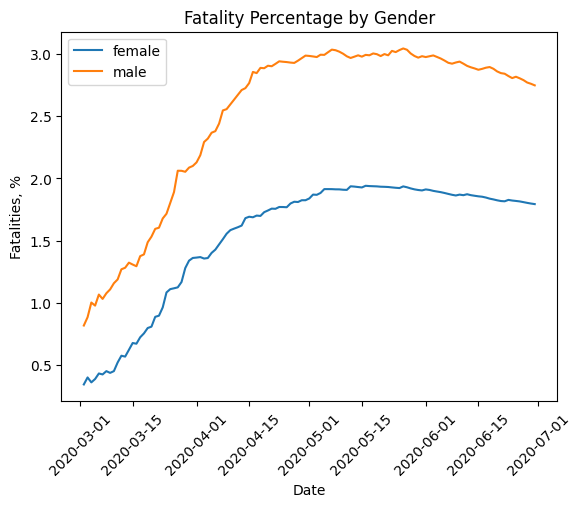

In [82]:
for gender, timegender_range in timegender_data.groupby(level='sex'):
    plt.plot(timegender_range.index.get_level_values('date'),
             timegender_range['fatalities, %'],
             label=gender)

set_parameters('Fatality Percentage by Gender',
              'Date',
              'Fatalities, %')

Looking at the plots we see that neither of the genders seem to be more susceptible to covid, though it does seem that covid is slightly more fatal to men than women.

## Searchtrend data

Next we will be looking at searchtrend data.

In [83]:
searchtrend_data

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381
...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720


In [84]:
searchtrend_data.isna().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [85]:
searchtrend_data['date'] = pd.to_datetime(searchtrend_data['date'])

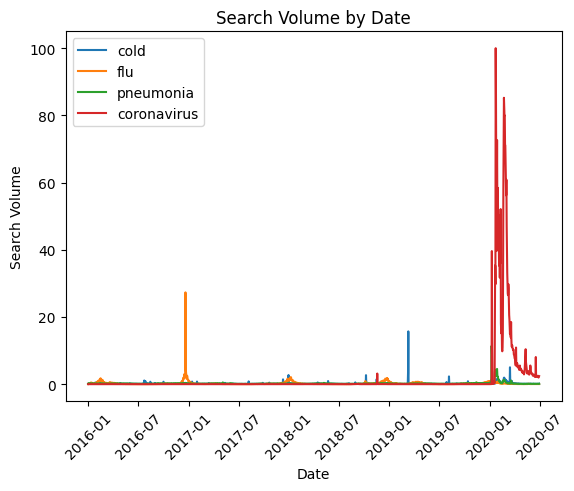

In [86]:
for label in searchtrend_data.columns[1:]:
    plt.plot(searchtrend_data['date'], searchtrend_data[label], label=label)
set_parameters('Search Volume by Date', 'Date', 'Search Volume')

We can see that just before the pandemic the amount of searches for coronavirus spiked, in the future this could be used to spread awareness and other related information during outbreaks, like doing an advertisement campaign to let people know where the relevant information could be found in the future.

# Recommendations

After conducting exploratory analysis of the data, we can identify several recommendations that would contribute to effectively addressing future coronavirus-like pandemics:
1. Implement temporary closures of non-religious and non-health-related services, particularly leisure and entertainment establishments. 
2. Religious centers should exercise caution by limiting the number of attendees, enforcing social distancing measures, mandating mask-wearing, and suspending worship practices that do not align with recommended guidelines.
3. Hospitals should prioritize the separation of individuals with the pandemic illness from those who have not contracted it. Healthcare personnel must exercise special care when treating such patients and take necessary precautions such as disinfecting their clothing and hands upon entering and leaving treatment facilities to minimize the risk of pathogen transmission.
4. Workplaces that have the potential to transition to remote work should facilitate such arrangements. If remote work is not feasible, employers should provide face masks and create safe work environments that enable social distancing, ensuring that groups of individuals are not in close proximity to each other.
5. Education institutions should prioritize the adoption of remote learning methods. In cases where remote learning is not feasible, schools should consider postponing activities or implementing smaller group sizes to ensure social distancing. Institutions must provide students and employees with face masks and enforce strict adherence to social distancing guidelines, particularly among teachers.
6. Stores that do not sell pharmaceuticals or food products should either temporarily close or strictly enforce mask wearing and social distancing measures. Additionally, implementing regulated pathways to control the flow of people within stores can help ensure safety and minimize close contact among customers.
7. The government should implement several key policies in response to the pandemic:
    1. Priority should be given to establishing drive-through testing facilities whenever feasible. 
    2. Additionally, the government should ensure the availability of face masks for citizens, promoting their widespread use.
    3. Incoming travelers from other countries should be required to undergo a mandatory quarantine for a specified period.
    4. It is essential to create an online information center or application that provides up-to-date and comprehensive information about the pandemic, including safety measures, precautions, and instructions for individuals who suspect they may have contracted the illness.
    5. Schools should continue with online education throughout the duration of the pandemic.
8. Based on available data, the proportion of elderly individuals living alone could have an impact on the number of coronavirus cases. Therefore, social organizations responsible for caring for the elderly should exercise special precautions when working with this vulnerable population. It is essential to minimize contact and avoid attending social gatherings. 
9. Given that the illness can be more severe for elderly individuals, others should exercise caution by refraining from interacting or limiting their social interactions to a minimum before engaging with older generations.
10. The government should leverage search patterns by initiating an early advertising campaign at the onset of a pandemic. This campaign should focus on promoting pandemic recommendations and raising awareness about reliable sources of information.

# Conclusions

To conclude, after analyzing South Korea's coronavirus data, we have derived a set of recommendations based on our findings. However, it's important to note that these recommendations are specific to a scenario where the illness is very similar to COVID-19, an airborne virus. If the nature of the illness differs significantly, some or the majority of these recommendations may not be applicable. For a more comprehensive and accurate understanding, it is crucial to consult with medical professionals and researchers who possess up-to-date knowledge and expertise.

Furthermore, while our analysis primarily utilized datasets from Kaggle, it is worth acknowledging that new information about the COVID-19 pandemic continues to emerged. Although we aimed to rely solely on the available data, it is possible that some conclusions may have been influenced by recent developments. It is important to note that utilizing up-to-date data would enhance the accuracy and comprehensiveness of the analysis.